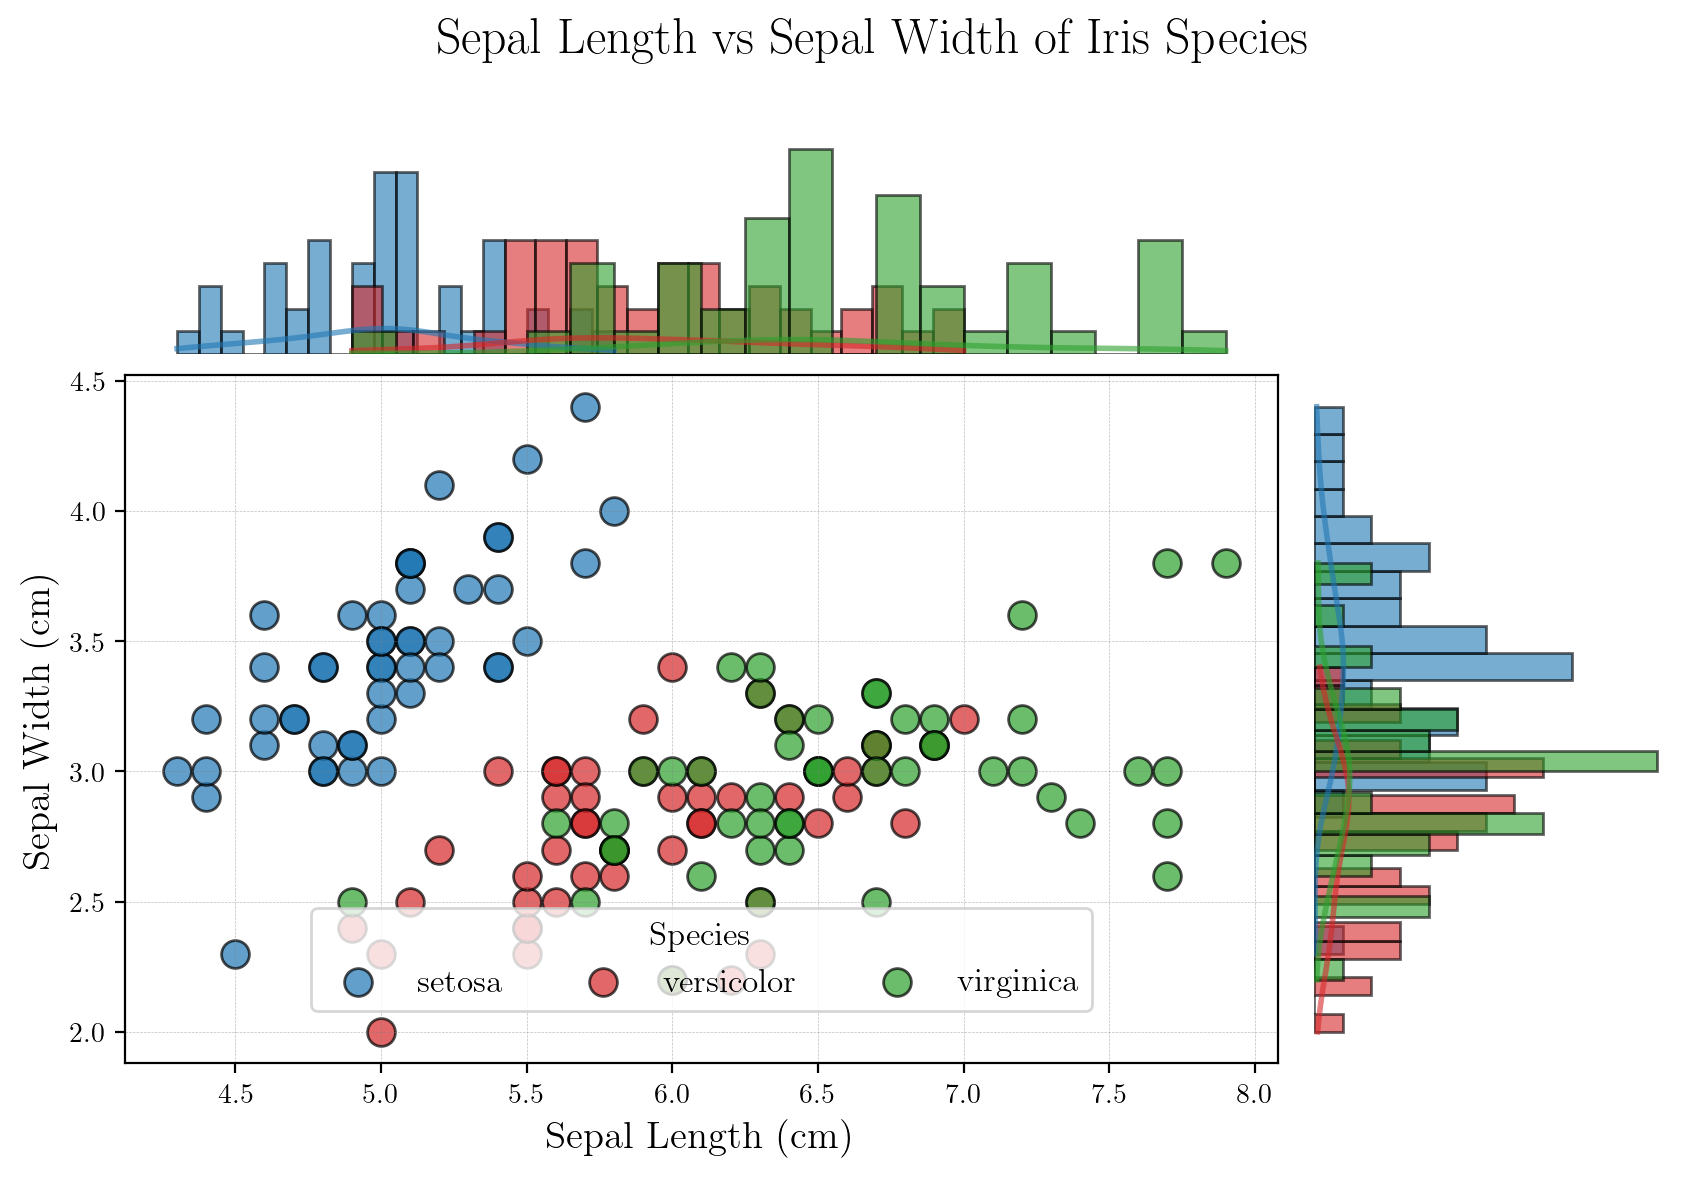

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import warnings
from scipy.stats import gaussian_kde

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Define color palette
colors = {"setosa": "tab:blue", "versicolor": "tab:red", "virginica": "tab:green"}

# Create the figure and axes
fig = plt.figure(figsize=(10, 6), dpi = 200)
grid = plt.GridSpec(4, 4, hspace=0.1, wspace=0.1)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Main scatter plot
ax_main = fig.add_subplot(grid[1:, :-1])
for species, color in colors.items():
    subset = df[df['species'] == species]
    ax_main.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                    label=species, color=color, s=100, alpha=0.7, edgecolor='k')

ax_main.set_xlabel('Sepal Length (cm)', fontsize=14)
ax_main.set_ylabel('Sepal Width (cm)', fontsize=14)
ax_main.legend(title='Species', fontsize='large', title_fontsize='large', loc='upper center', bbox_to_anchor=(0.5, 0.25), ncol=3)
ax_main.grid(color='grey', linestyle='--', linewidth=0.25, alpha=0.5)

# Marginal histograms
ax_histx = fig.add_subplot(grid[0, :-1], sharex=ax_main)
ax_histy = fig.add_subplot(grid[1:, -1], sharey=ax_main)

for species, color in colors.items():
    subset = df[df['species'] == species]
    ax_histx.hist(subset['sepal length (cm)'], bins=20, color=color, alpha=0.6, edgecolor='k')
    ax_histy.hist(subset['sepal width (cm)'], bins=20, color=color, alpha=0.6, orientation='horizontal', edgecolor='k')

ax_histx.axis('off')
ax_histy.axis('off')

# KDE plots
for species, color in colors.items():
    subset = df[df['species'] == species]
    kde_x = gaussian_kde(subset['sepal length (cm)'])
    kde_y = gaussian_kde(subset['sepal width (cm)'])
    
    x_range = np.linspace(subset['sepal length (cm)'].min(), subset['sepal length (cm)'].max(), 100)
    y_range = np.linspace(subset['sepal width (cm)'].min(), subset['sepal width (cm)'].max(), 100)
    
    ax_histx.plot(x_range, kde_x(x_range), color=color, alpha=0.6, lw=2)
    ax_histy.plot(kde_y(y_range), y_range, color=color, alpha=0.6, lw=2)

# Main title
plt.suptitle("Sepal Length vs Sepal Width of Iris Species", fontsize=18, weight='bold')

# Show plot
plt.show()